# Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
import xgboost as xg
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Hyperparameter tuner and Cross Validation
from sklearn.ensemble import VotingRegressor

import shap

#sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={"figure.dpi":300, 'savefig.dpi':800})

import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Times New Roman')
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
df = pd.read_csv("df1.csv")

In [3]:
X = df.drop(['drug_perm_per','drug_perm_amt'], axis=1)
y = df[["drug_perm_per"]]
columns = []
for i in X.columns:
    columns.append(i)

# SHAP

In [7]:
df.columns = ["Drug's name", "Drug loaded", "Drug's MW", "MN length", "Skin type", "MN type", "MN surface area", "Permeation time", "drug_perm_per", "drug_perm_amt"]

In [11]:
# Per - VR
X = df.drop(['drug_perm_per','drug_perm_amt'], axis=1)
y = df[["drug_perm_per"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True, random_state=0)


model_1 = xg.XGBRegressor(max_depth = 10, eta = 0.2, verbosity = 0)
model_1.fit(X_train, y_train)

model_2 = RandomForestRegressor(n_estimators=100, random_state=1)
model_2.fit(X_train, y_train)

model_4 = GradientBoostingRegressor()
model_4.fit(X_train, y_train)

model_5 = neighbors.KNeighborsRegressor(n_neighbors = 1)
model_5.fit(X_train, y_train)

final_model = VotingRegressor(estimators=[('xgb', model_1), ('rf', model_2), ('gbr', model_4), ('knn',model_5)])
final_model.fit(X_train, y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False, eta=0.2,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learn...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('gbr', GradientBoostingRegressor()),
                            ('knn', KNeighborsRegressor(n_neighbors=1))])

In [17]:
X_importance = X_test


explainer_XGB = shap.TreeExplainer(model_1)
shap_values_XGB = explainer_XGB.shap_values(X_importance)

explainer_RF = shap.TreeExplainer(model_2)
shap_values_RF = explainer_RF.shap_values(X_importance)

explainer_GB = shap.TreeExplainer(model_4)
shap_values_GB = explainer_GB.shap_values(X_importance)

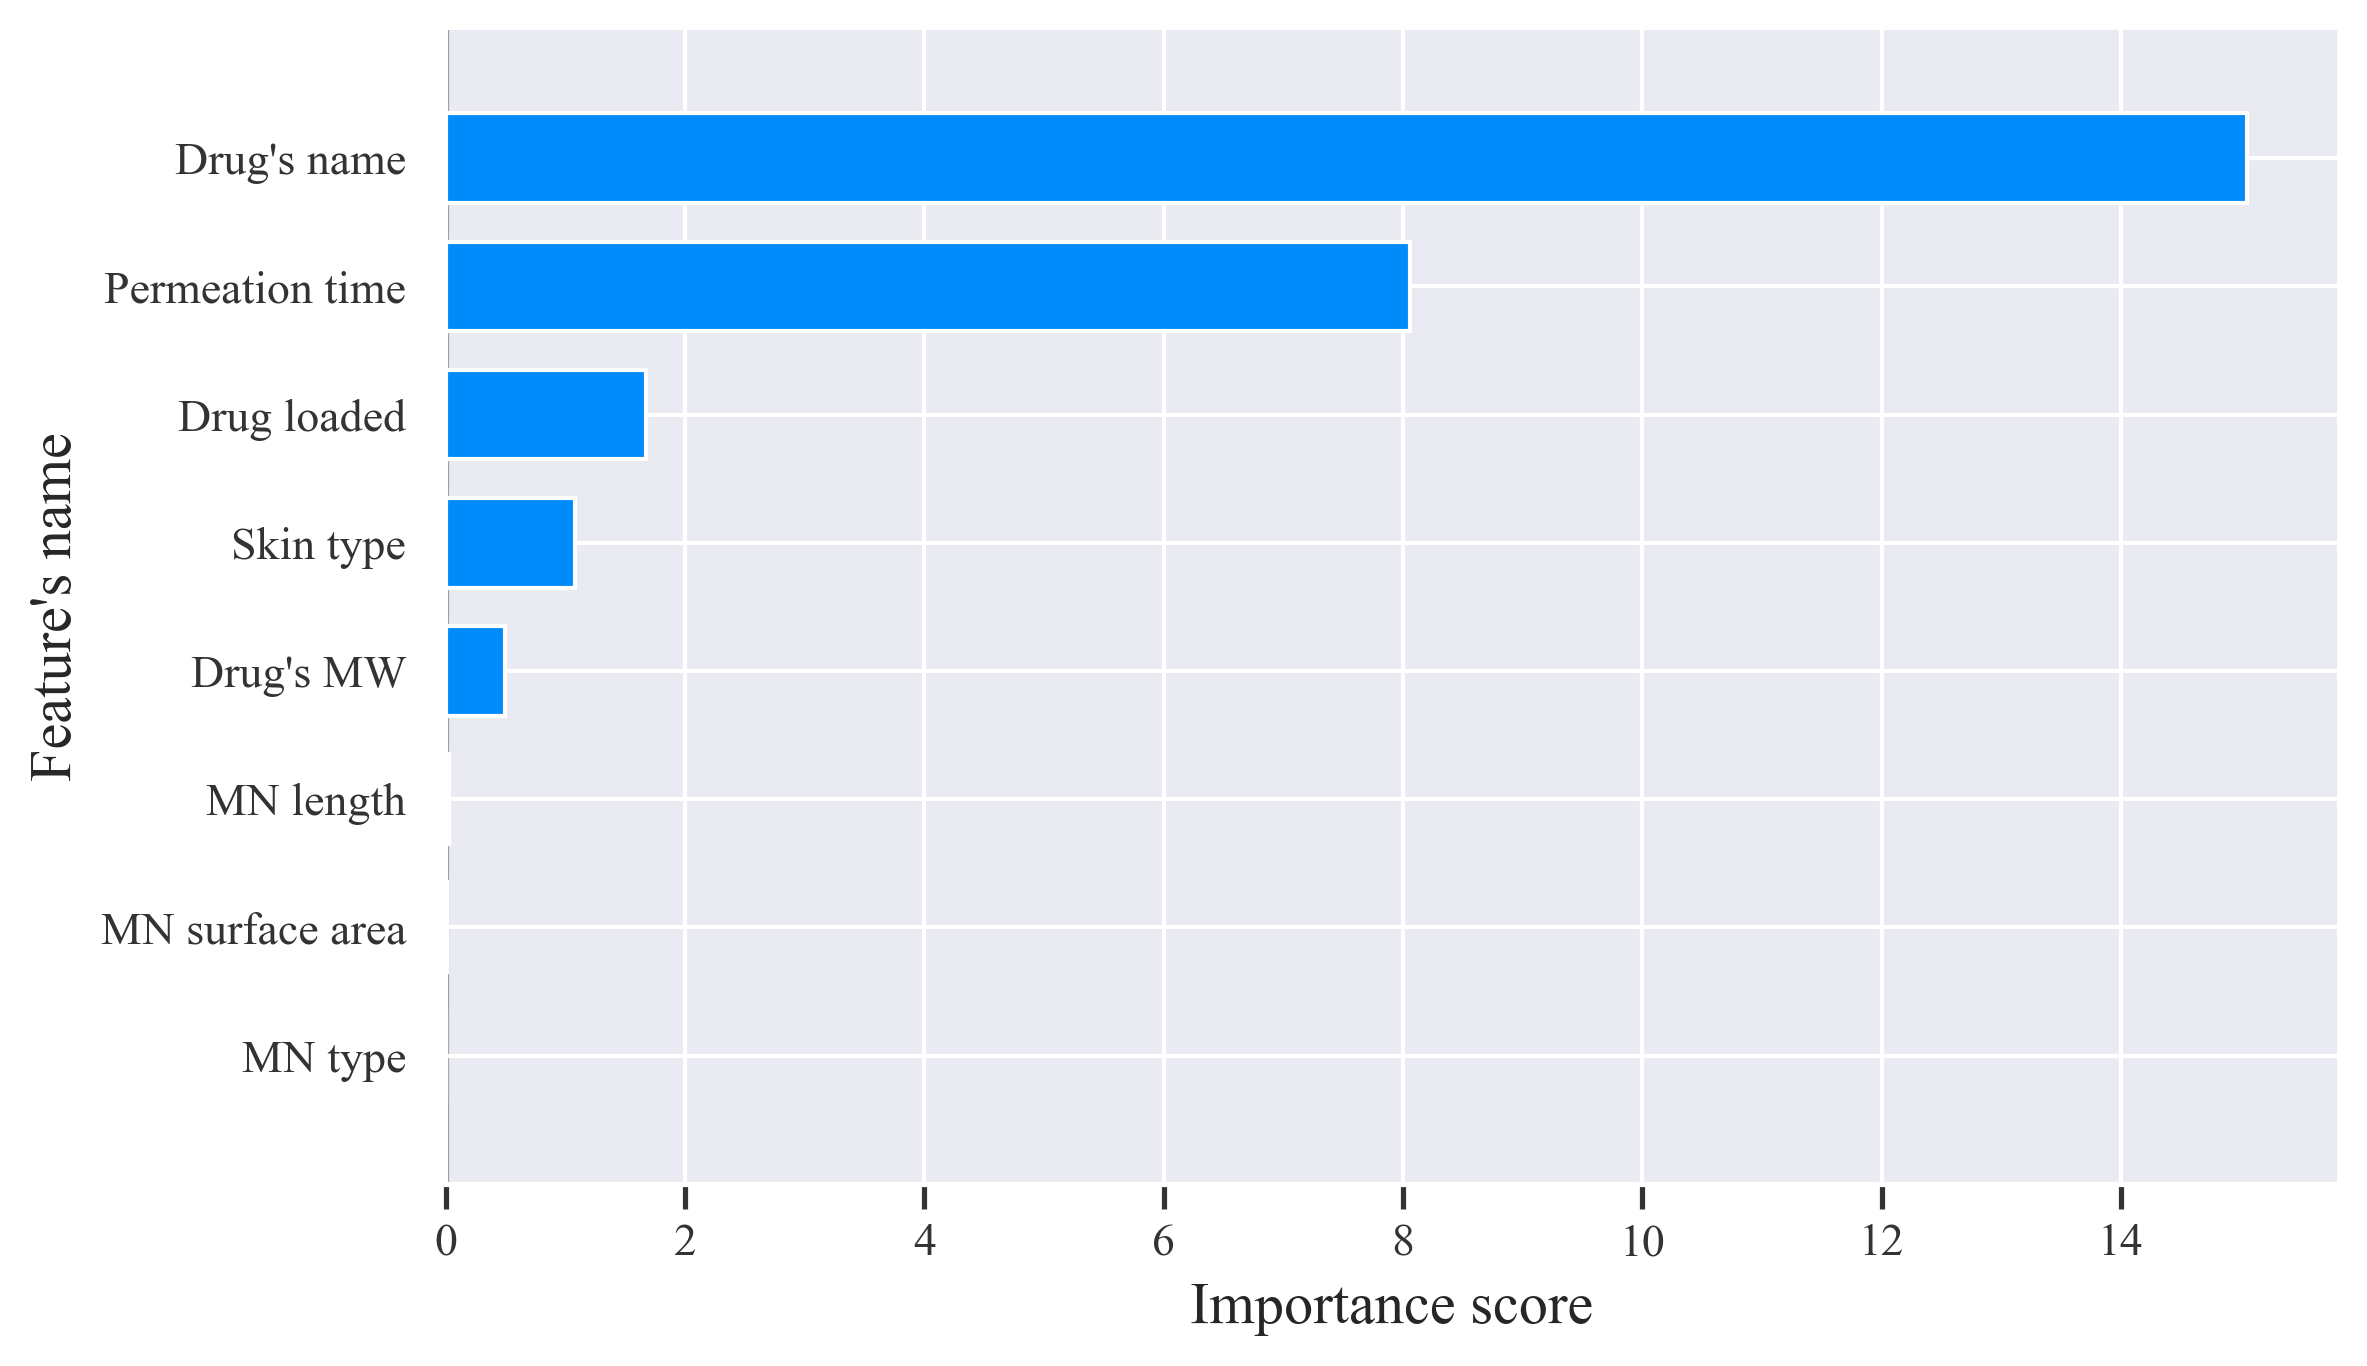

In [78]:
shap.summary_plot(shap_values_XGB, X_importance, plot_type='bar', show=False)
plt.xlabel("Importance score", fontsize=14, fontname='Times New Roman')
plt.ylabel("Feature's name", fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=11, fontname='Times New Roman')
plt.yticks(fontsize=11, fontname='Times New Roman')
plt.show()

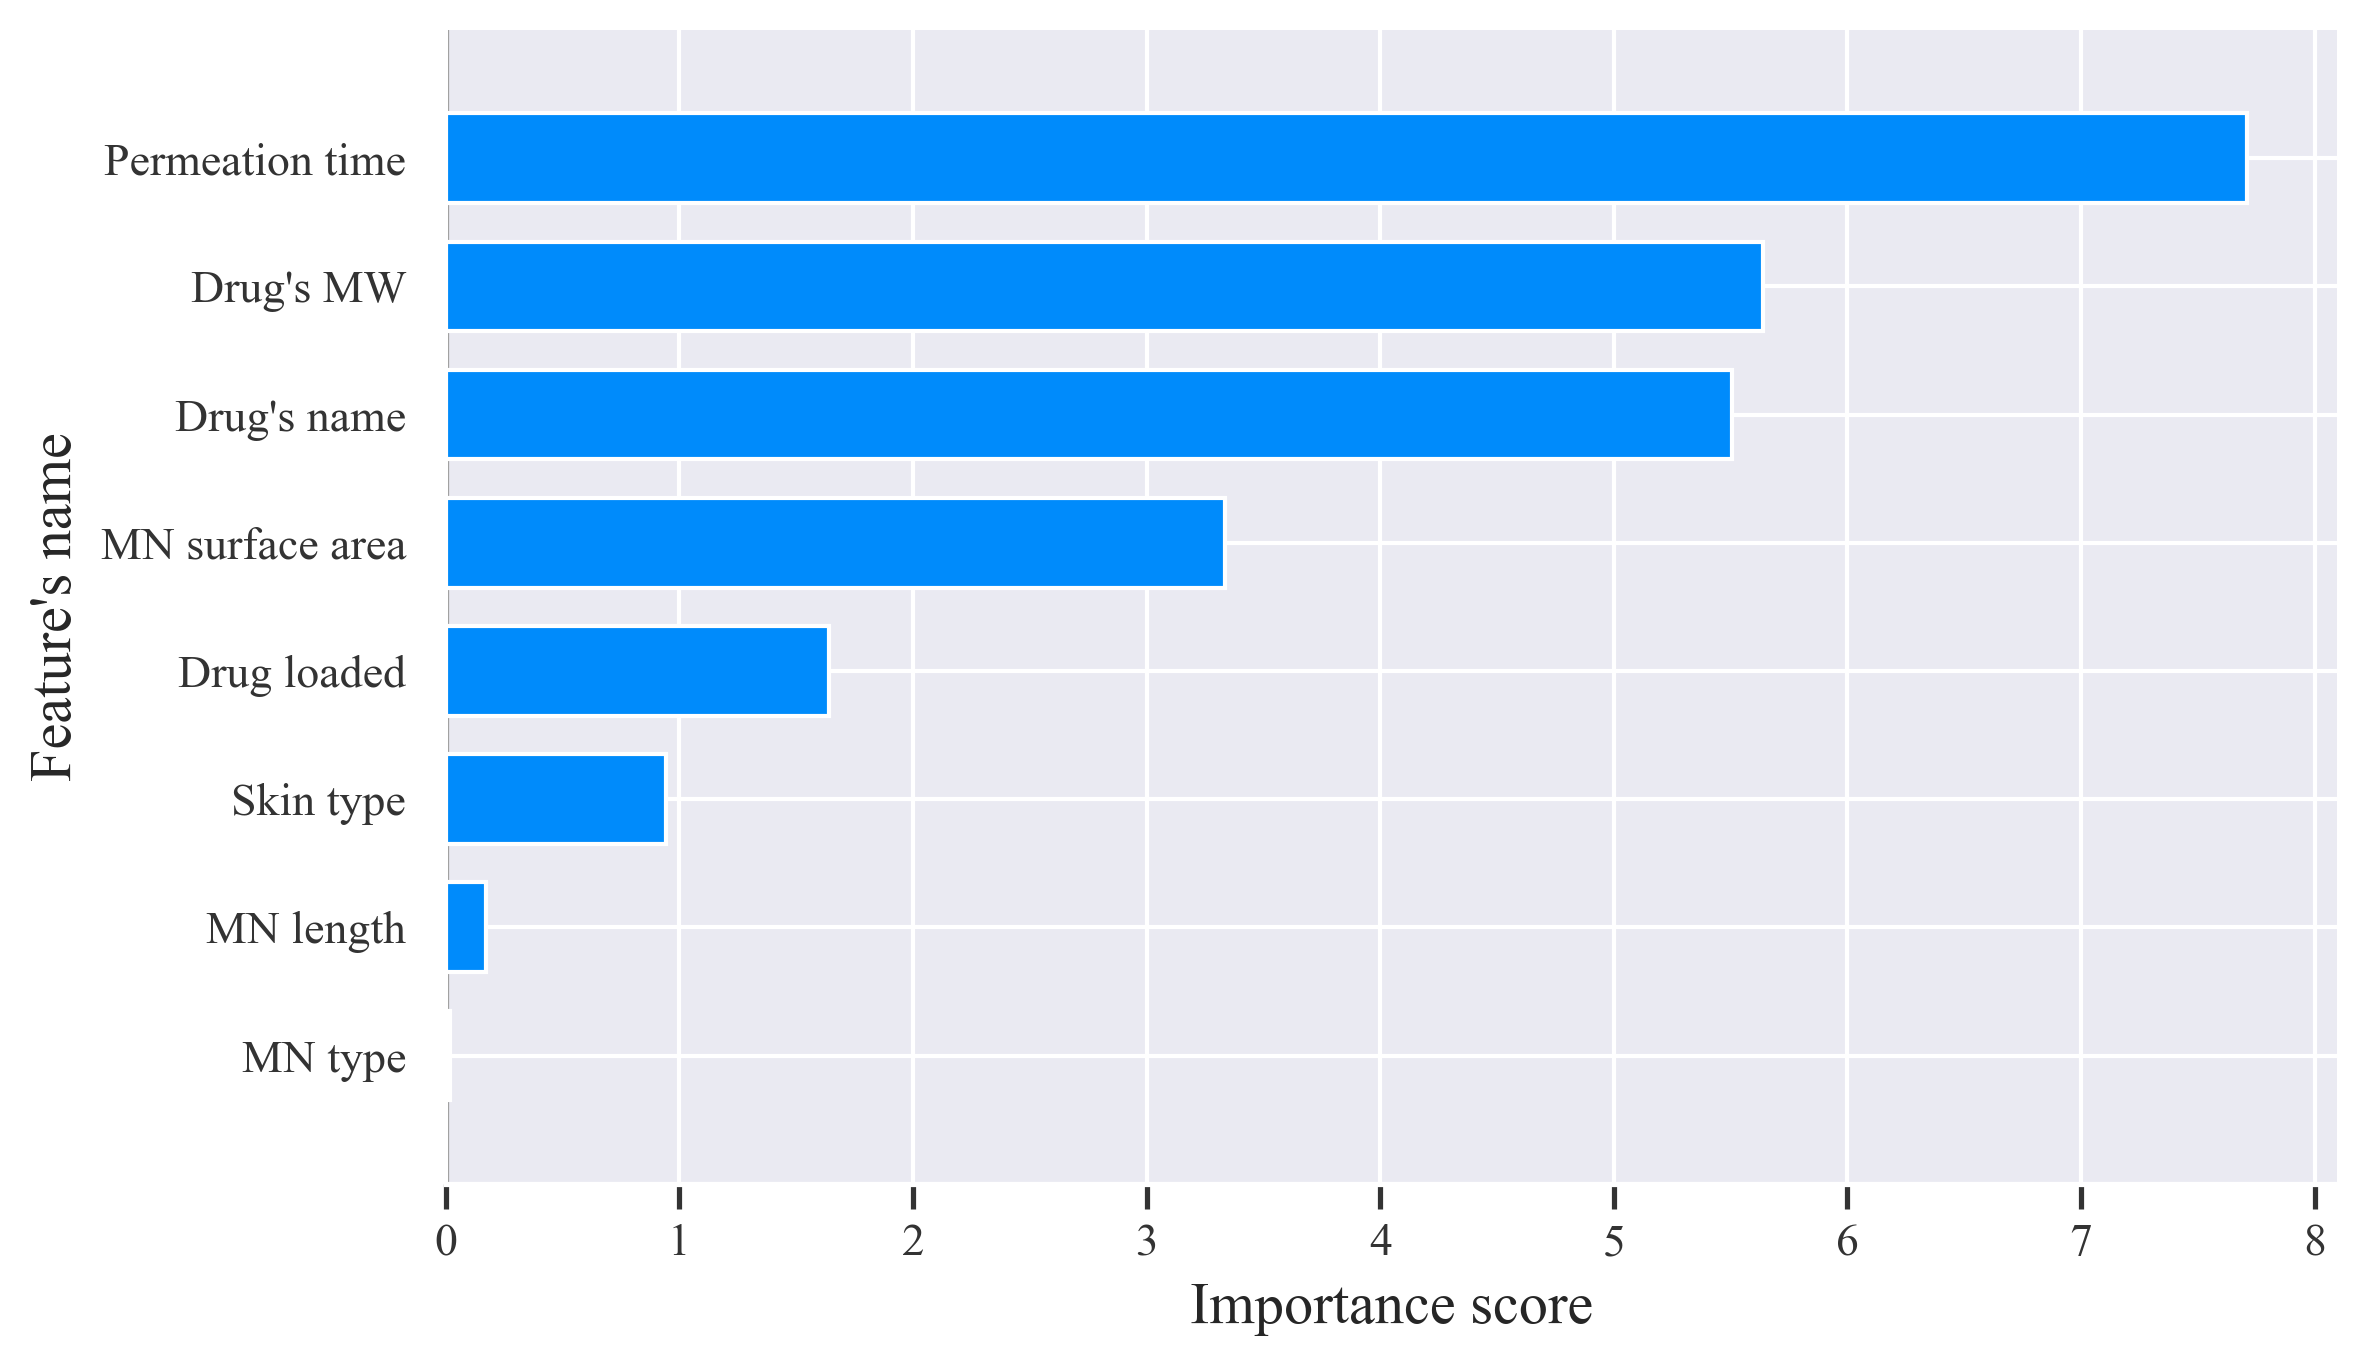

In [77]:
shap.summary_plot(shap_values_RF, X_importance, plot_type='bar', show=False)
plt.xlabel("Importance score", fontsize=14, fontname='Times New Roman')
plt.ylabel("Feature's name", fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=11, fontname='Times New Roman')
plt.yticks(fontsize=11, fontname='Times New Roman')
plt.show()

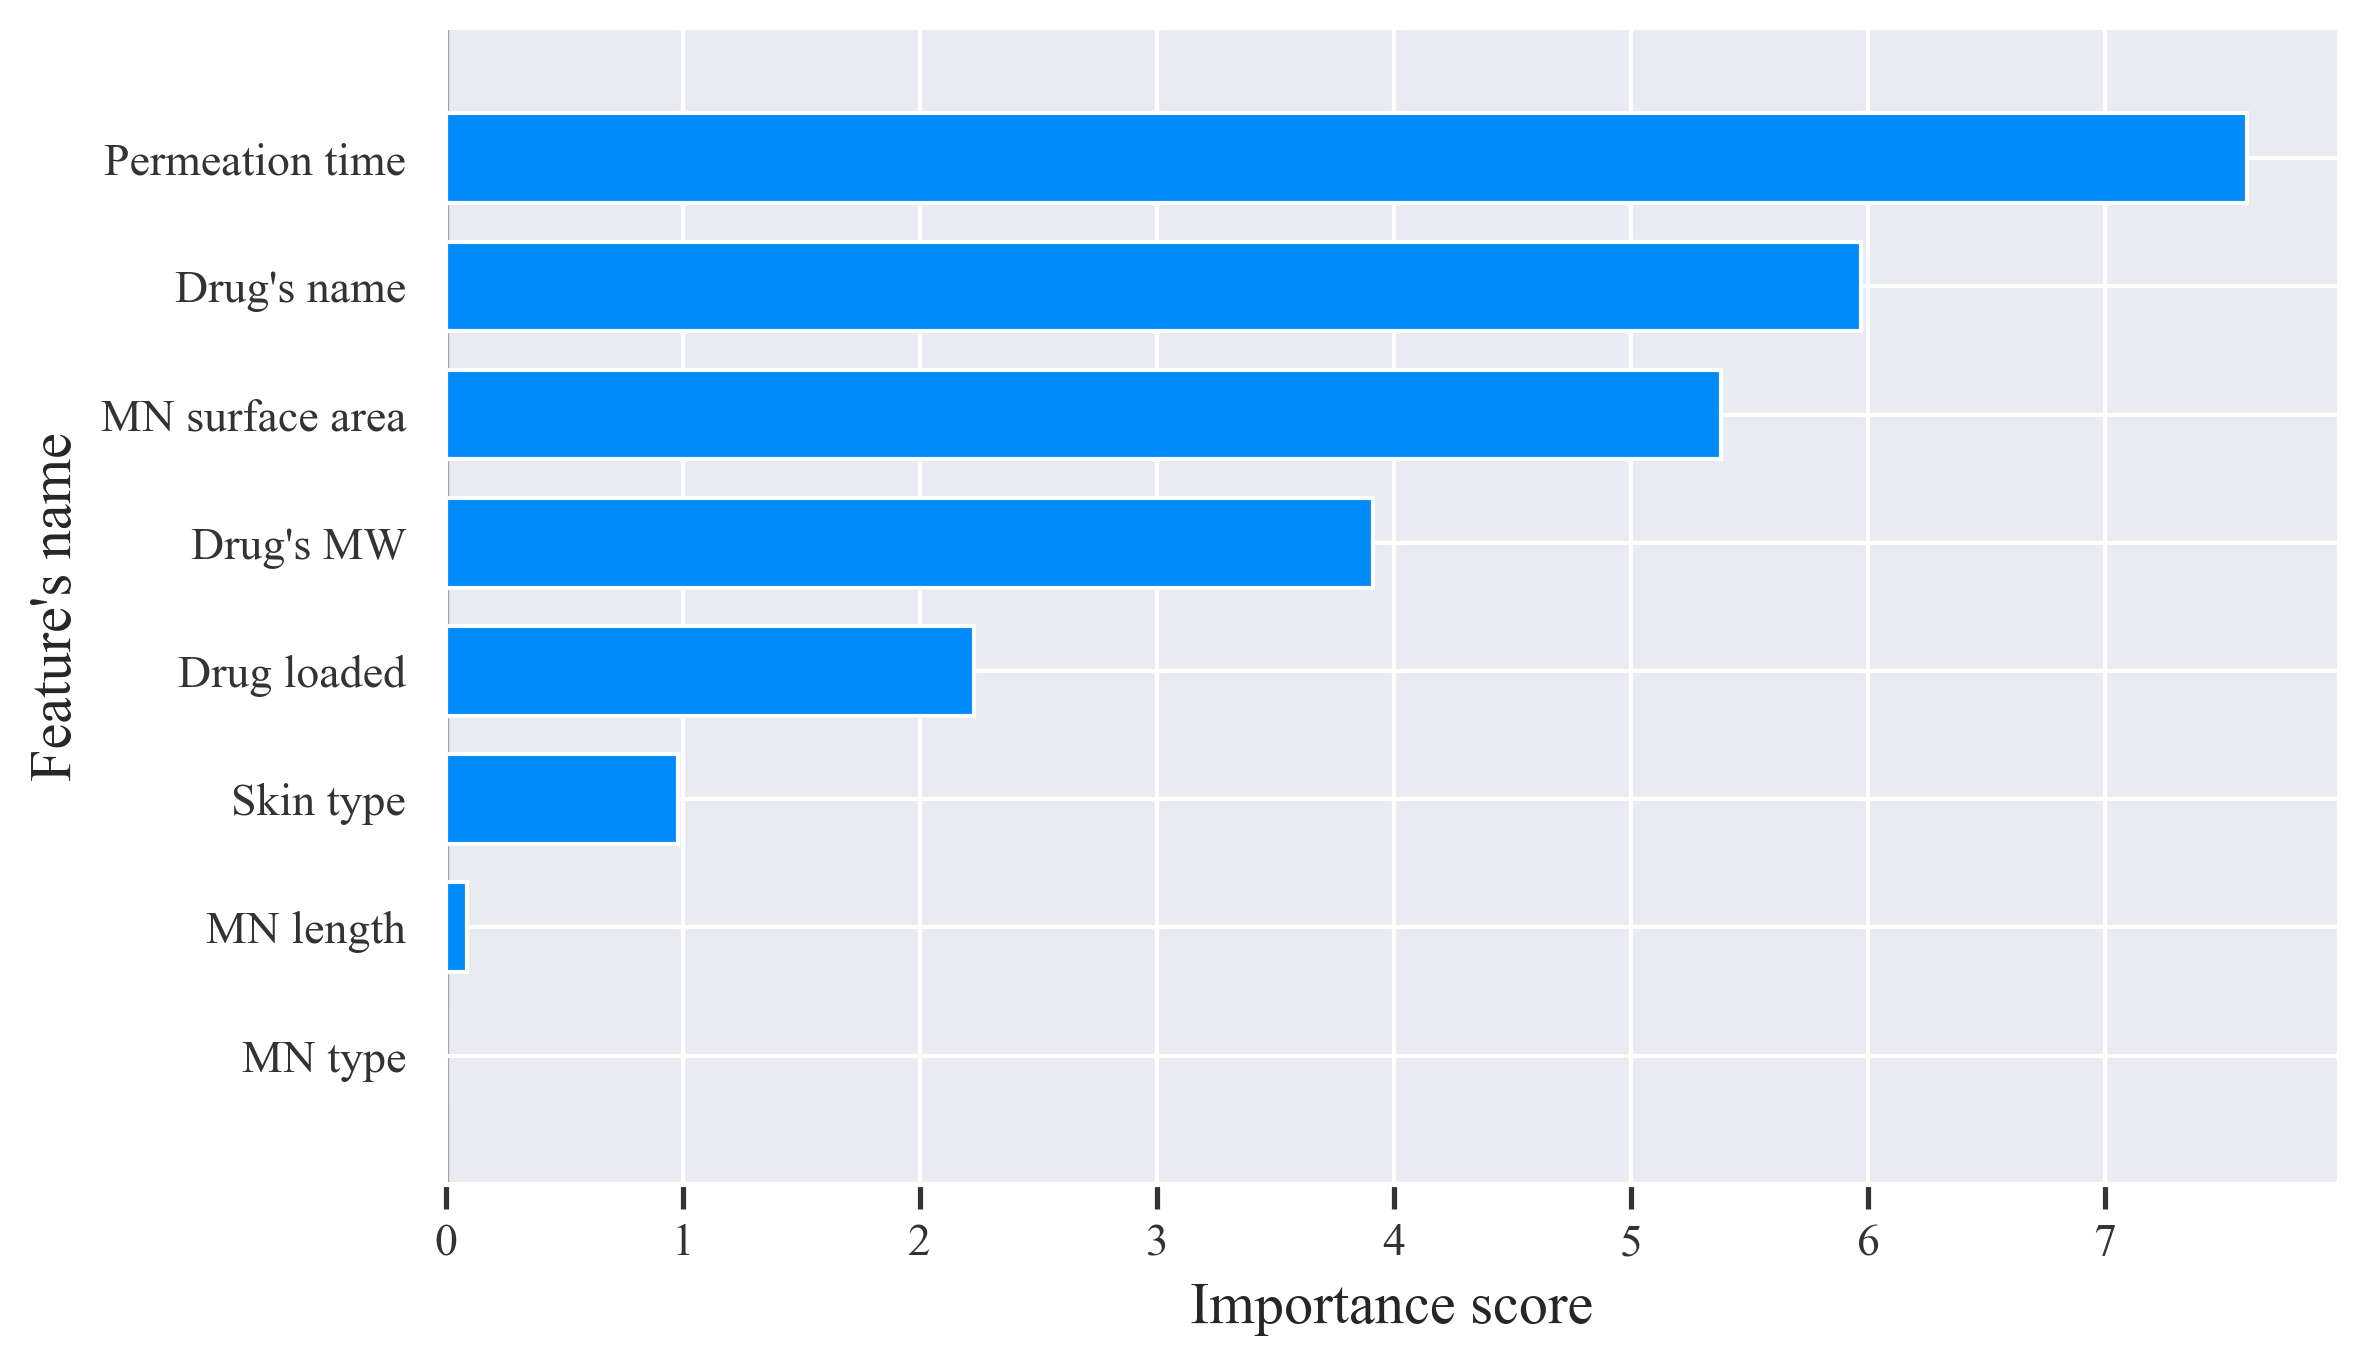

In [71]:
shap.summary_plot(shap_values_GB, X_importance, plot_type='bar', show=False)
#fig, ax = plt.gcf(), plt.gca()
#ax.set_xlabel("ABC")
plt.xlabel("Importance score", fontsize=14, fontname='Times New Roman')
plt.ylabel("Feature's name", fontsize=14, fontname='Times New Roman')
plt.xticks(fontsize=11, fontname='Times New Roman')
plt.yticks(fontsize=11, fontname='Times New Roman')
plt.show()

Feature: 0, Score: 0.00003
Feature: 1, Score: 244.76051
Feature: 2, Score: 869.35511
Feature: 3, Score: 0.00000
Feature: 4, Score: 3.96608
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 265.68343


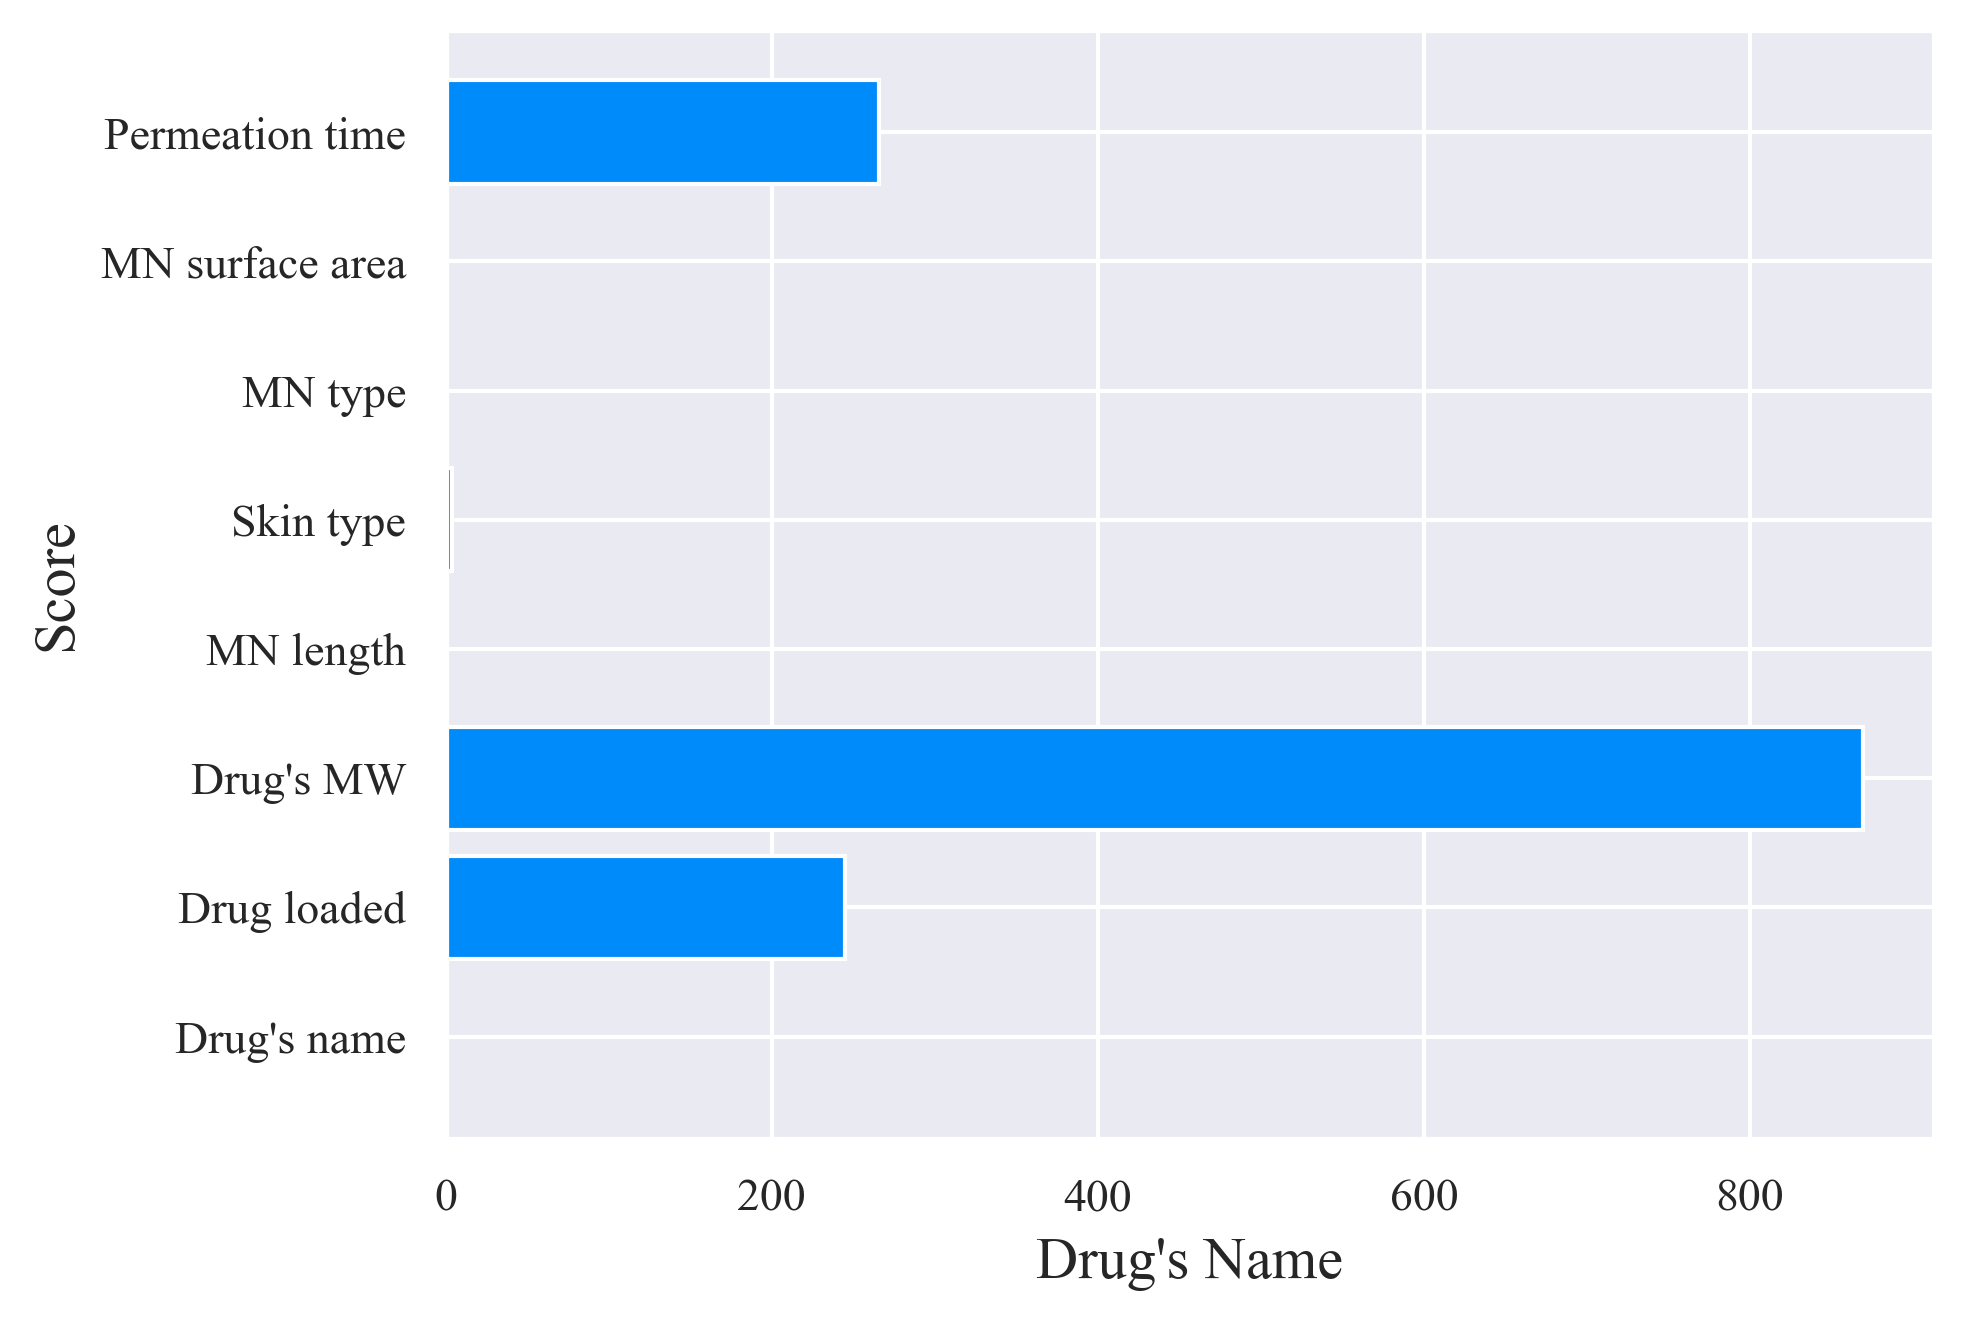

In [40]:
from sklearn.inspection import permutation_importance
results = permutation_importance(model_5, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.barh(["Drug's name", "Drug loaded", "Drug's MW", "MN length", "Skin type", "MN type", "MN surface area", "Permeation time"], importance, color=["#008BFB"])
#plt.xticks(rotation='vertical')
plt.xlabel("Drug's Name", fontsize=14, fontname='Times New Roman')
plt.ylabel("Score", fontsize=14, fontname='Times New Roman')
#plt.xticks(fontsize=12, fontname='Times New Roman')
#plt.yticks(fontsize=12, fontname='Times New Roman')
#plt.xticks(x, list(X_train.columns))
plt.show()

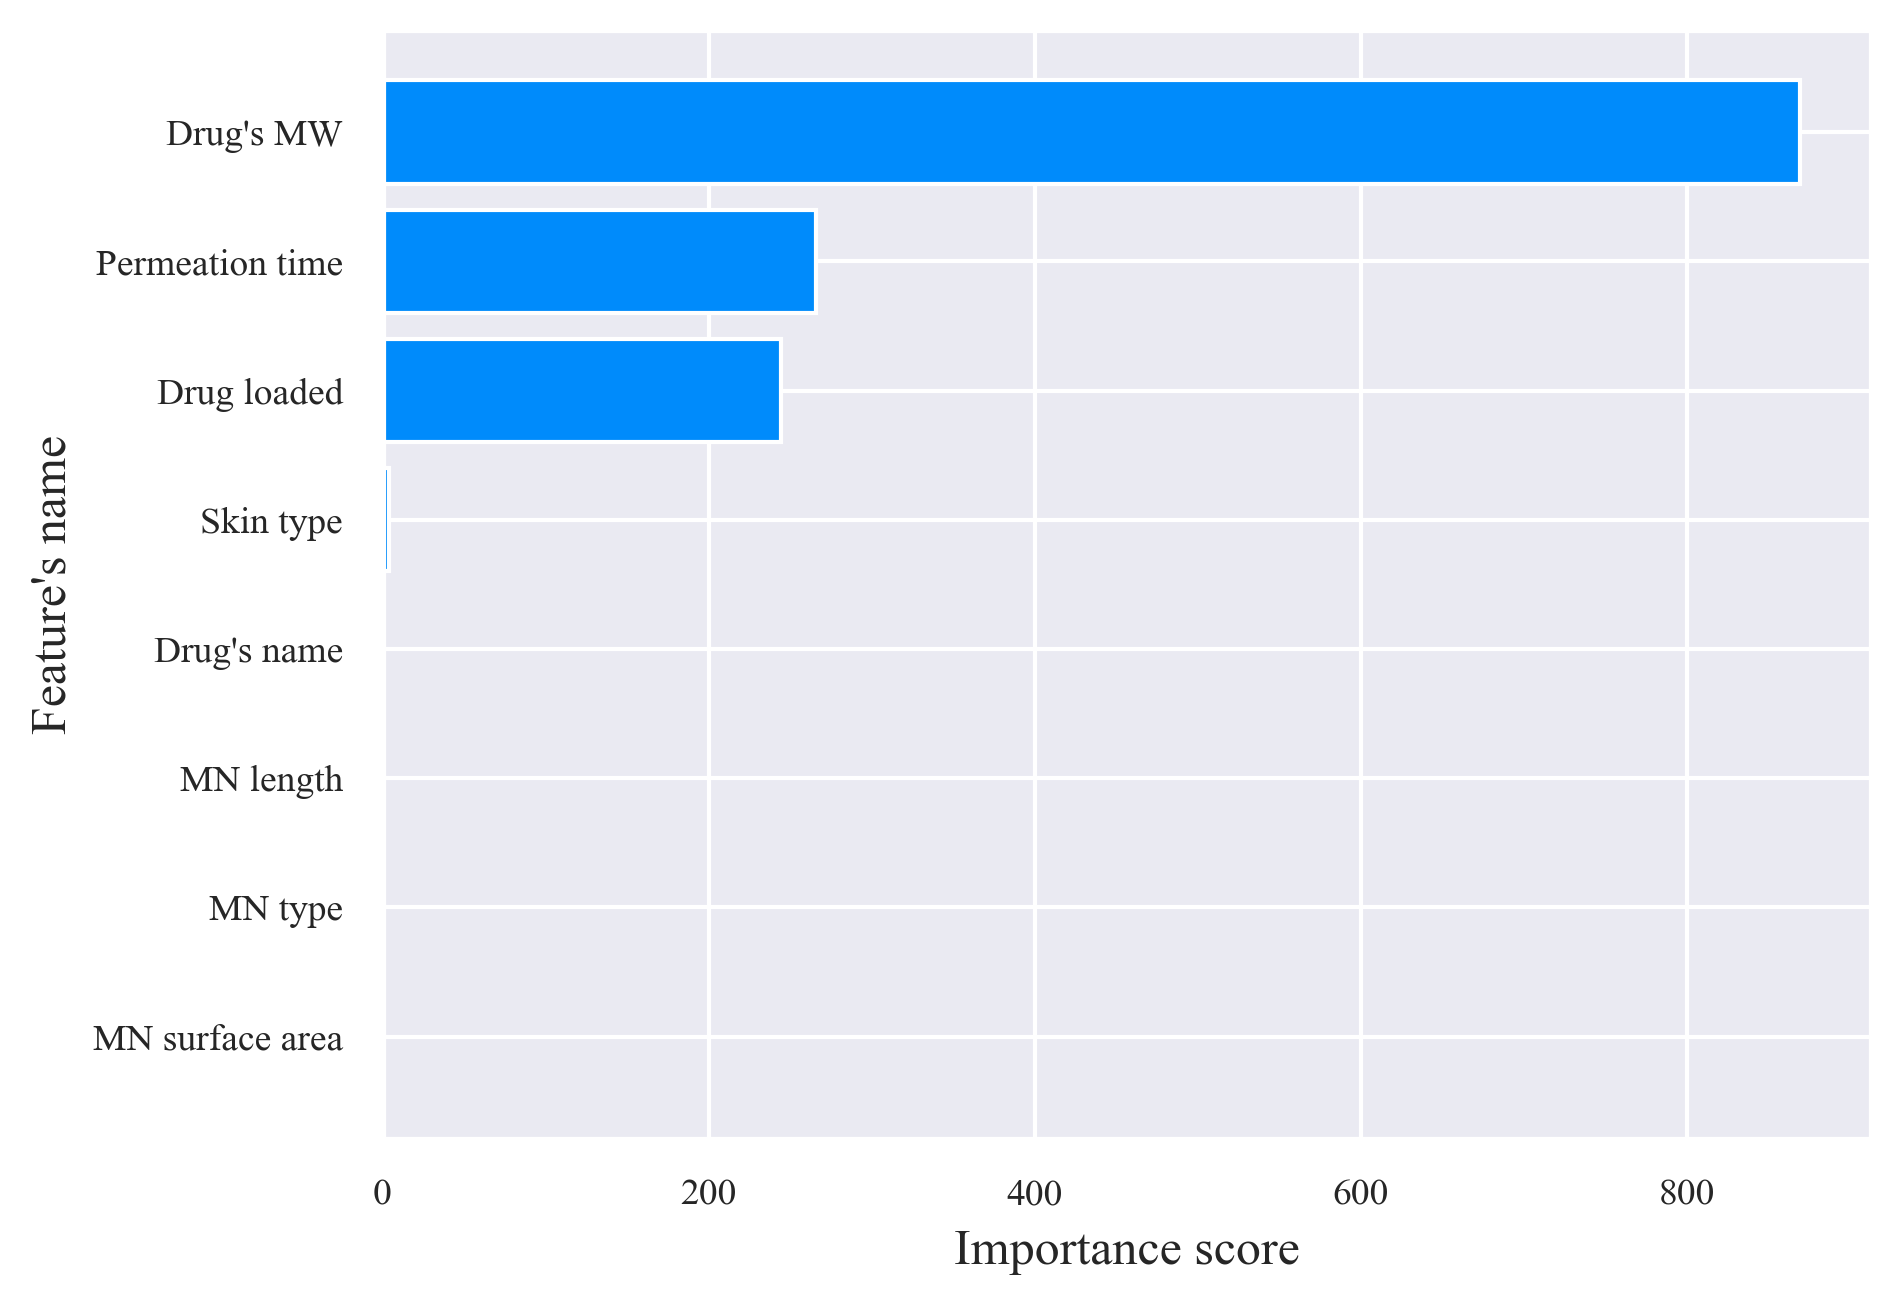

In [76]:
imp = [importance[2], importance[7], importance[1], importance[4], importance[0], importance[3], importance[5], importance[6]]
plt.barh(["MN surface area", "MN type", "MN length", "Drug's name", "Skin type", "Drug loaded", "Permeation time", "Drug's MW"], imp[::-1], color=["#008BFB"])
plt.xlabel("Importance score", fontsize=12, fontname='Times New Roman')
plt.ylabel("Feature's name", fontsize=12, fontname='Times New Roman')
plt.xticks(fontsize=9, fontname='Times New Roman')
plt.yticks(fontsize=9, fontname='Times New Roman')
plt.show()